In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = 'BigEarthNet'
# dataset = 'EuroSAT'
dataset = 'So2Sat'
dataset = 'OSCD'
models = []
names = []
models += ['vit_base_patch16_224']
models += ['cvit_base_patch16_224']
names += ['mae_vit_v2']
names += ['mae_cvit_v2']
# names += ['mae_base']
# names += ['mae_vit_btnk']
metric = 'mAP' if dataset == 'BigEarthNet' else 'image_acc'
if dataset == 'OSCD':
    # metric = 'precision'
    metric = 'f1'
    # metric = 'recall'

In [5]:
df_all = pd.DataFrame()
for model, name in zip(models, names):
    try:
        path = f'./results/logs/{dataset}_{model}_{name}/ft_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # df.sort_values(by=[metric], inplace=True)
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all

,epochs,lr,weight_decay,bce,loss,precision,recall,f1,epoch,num_samples,model
0,40,0.0050,0.0005,0.155790,0.155790,0.516799,0.347100,0.415282,40,515,mae_vit_v2
1,40,0.0050,0.0000,0.153684,0.153684,0.520305,0.350870,0.419111,40,515,mae_vit_v2
2,40,0.0050,0.0050,0.157793,0.157793,0.499218,0.362884,0.420271,40,515,mae_vit_v2
3,40,0.0010,0.0000,0.143886,0.143886,0.563523,0.384041,0.456784,40,515,mae_vit_v2
4,40,0.0005,0.0005,0.155917,0.155917,0.575970,0.402808,0.474071,40,515,mae_vit_v2
5,40,0.0005,0.0050,0.155180,0.155180,0.578654,0.402006,0.474420,40,515,mae_vit_v2
6,40,0.0005,0.0000,0.153849,0.153849,0.589378,0.398574,0.475551,40,515,mae_vit_v2
7,40,0.0050,0.0050,0.189774,0.189774,0.595177,0.140716,0.227617,40,515,mae_cvit_v2
8,40,0.0050,0.0000,0.191595,0.191595,0.595956,0.145287,0.233621,40,515,mae_cvit_v2
9,40,0.0050,0.0005,0.188661,0.188661,0.602433,0.151945,0.242681,40,515,mae_cvit_v2


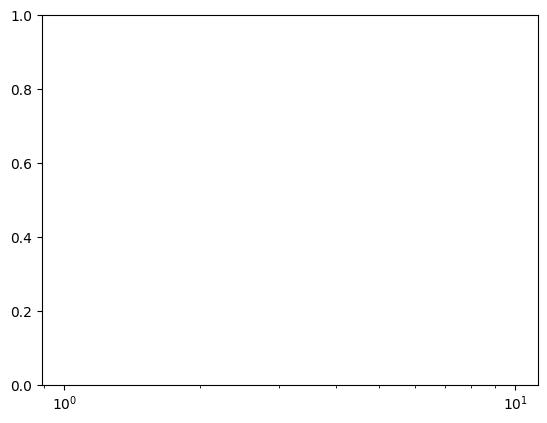

In [ ]:
sns.lineplot(data=df_all.loc[df_all.weight_decay==1e-3], x='lr', y=metric, hue='model')
# set x axis log scale
plt.xscale('log')

In [16]:
df_all = pd.DataFrame()
for model, name in zip(models, names):
    try:
        path = f'./results/logs/{dataset}_{model}_{name}/lp_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # df.sort_values(by=[metric], inplace=True)
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all

""


<Axes: xlabel='lr', ylabel='image_acc'>

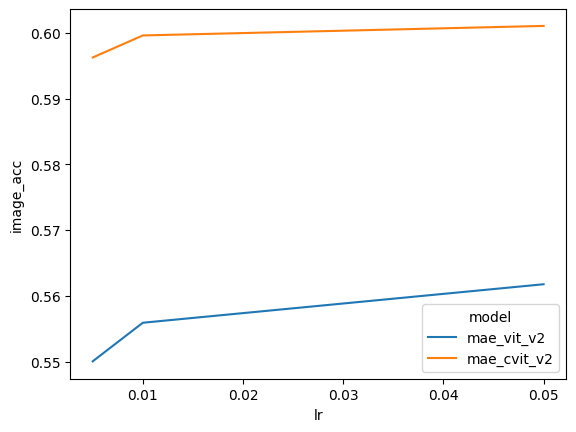

In [12]:
sns.lineplot(data=df_all.loc[df_all.epochs==100], x='lr', y=metric, hue='model')